<a href="https://colab.research.google.com/github/stxupengyu/NCF-MF-for-Recommendation/blob/main/yelp_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Link Google Drive

In [ ]:
#link google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#enter the folder
!ls
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Dataset@Yelp')
!ls

drive  sample_data
best_model.h5		    sentence_embeddings.csv		 yelp_academic_dataset_checkin.json
business_data_subset.csv    test.csv				 yelp_academic_dataset_review.csv
Dataset_User_Agreement.pdf  train.csv				 yelp_academic_dataset_review.json
rating.csv		    yelp_academic_dataset_business.csv	 yelp_academic_dataset_tip.json
rating_text.csv		    yelp_academic_dataset_business.json  yelp_academic_dataset_user.json


#Download Data

In [ ]:
#下载并上传kaggle.json文件
!pip install kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Project/Deep-Rec-Sys"
#download kaggle dataset(10GB)
!kaggle datasets download -d yelp-dataset/yelp-dataset
!ls
!unzip yelp-dataset.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/drive/My Drive/Project/Deep-Rec-Sys. Or use the environment method.
best_model.h5		    sentence_embeddings.csv		 yelp_academic_dataset_checkin.json
business_data_subset.csv    test.csv				 yelp_academic_dataset_review.csv
Dataset_User_Agreement.pdf  train.csv				 yelp_academic_dataset_review.json
rating.csv		    yelp_academic_dataset_business.csv	 yelp_academic_dataset_tip.json
rating_text.csv		    yelp_academic_dataset_business.json  yelp_academic_dataset_user.json
unzip:  cannot find or open yelp-dataset.zip, yel

#Read Bussiness Data

In [ ]:
#read the dataset:yelp,review&business
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# We only use the first 1,000,000 data in this assignment
users = []
with open('yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 1000000:
            break
subset_business = pd.DataFrame(users)
print('The shape of the data:',subset_business.shape)
display(subset_business.head(5))

The shape of the data: (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


# Ratings Distribution:

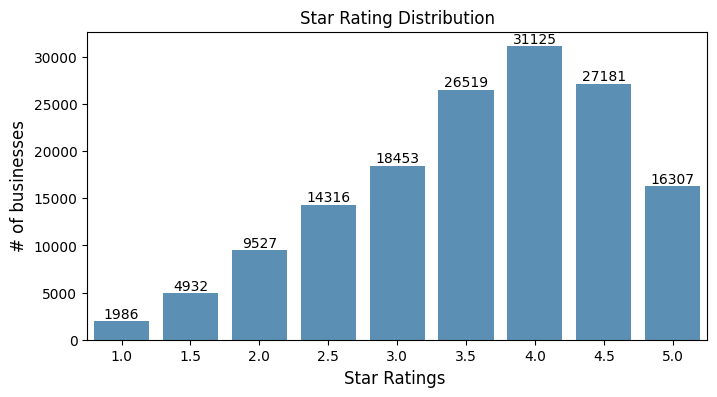

In [ ]:
#Get the distribution of the ratings
x=subset_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Categories Distribution:

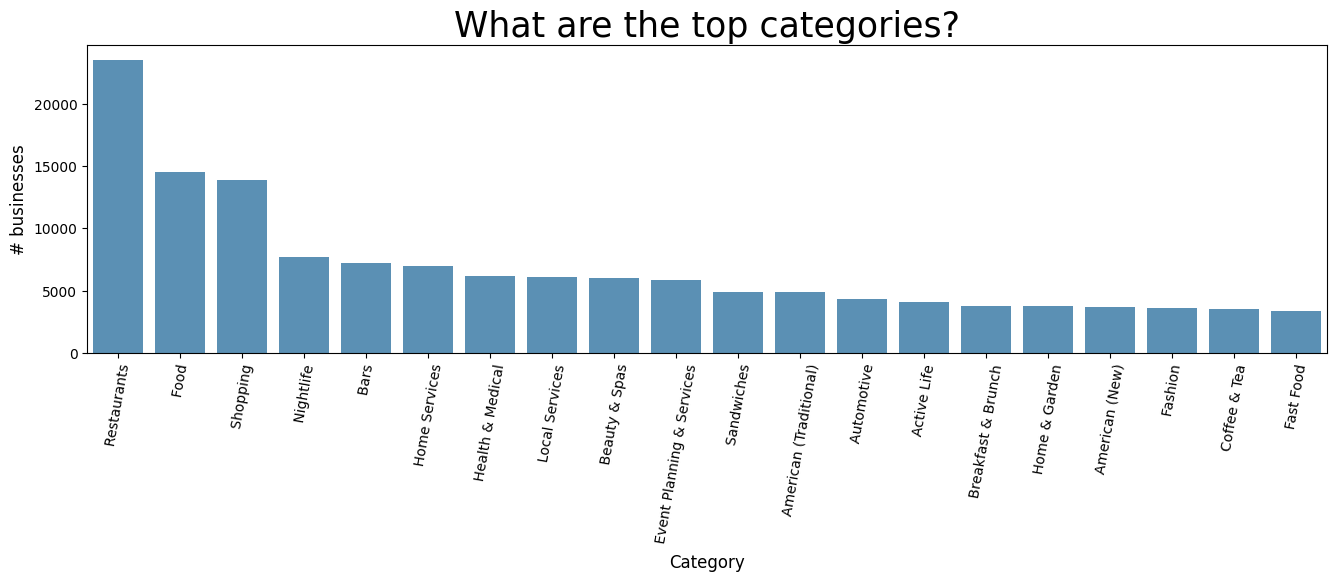

In [ ]:
business_cats = ''.join(subset_business['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#Read Review Data

In [ ]:
# We only use the first 1,000,000 data in this assignment
users = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 1000000:
            break
subset_review = pd.DataFrame(users)
print('The shape of the data:',subset_review.shape)
display(subset_review.head(5))

The shape of the data: (1000000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
# pull out needed columns from subset_review table
df_review = subset_review[['user_id','business_id','stars', 'useful','funny','cool','text']]
display(df_review.head(5))

,user_id,business_id,stars,useful,funny,cool,text
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is..."
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...


#Combine Two Data in Philadelphia

In [ ]:
# Businesses in Philadelphia and currently open business
city = subset_business[(subset_business['city'] == 'Philadelphia')] #& (subset_business['is_open'] == 1)]
Philadelphia = city[['business_id','name','address', 'categories', 'attributes','stars']]
rest = Philadelphia.reset_index()
display(rest.head(5))

,index,business_id,name,address,categories,attributes,stars
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'RestaurantsDelivery': 'False', 'OutdoorSeati...",4.0
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,"Sushi Bars, Restaurants, Japanese","{'RestaurantsReservations': 'True', 'Restauran...",4.0
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,"Korean, Restaurants","{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...",4.5
3,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,"Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...",4.0
4,31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,"Pizza, Restaurants, Salad, Soup","{'RestaurantsReservations': 'False', 'Caters':...",3.0


In [ ]:
# pull out names and addresses of the restaurants from rest table
restaurant = rest[['business_id', 'name', 'address','categories']]
display(restaurant.head(5))

,business_id,name,address,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,"Sushi Bars, Restaurants, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,"Korean, Restaurants"
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,"Pizza, Restaurants, Salad, Soup"


In [ ]:
# combine df_review and restaurant table
combined_business_data = pd.merge(df_review, restaurant, on='business_id')
display(combined_business_data.head(5))

,user_id,business_id,stars,useful,funny,cool,text,name,address,categories
0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl","Active Life, Cycling Classes, Trainers, Gyms, ..."
1,BwSiqaeusSkkLRefYFB-Vg,7ATYjTIgM3jUlt4UM3IypQ,5.0,0,0,0,I've been going to Body Cycle for about a year...,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl","Active Life, Cycling Classes, Trainers, Gyms, ..."
2,d6H0HhqyOLiihCG6gbV4cg,7ATYjTIgM3jUlt4UM3IypQ,5.0,2,0,0,I started going to BCS in May or June of 2014....,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl","Active Life, Cycling Classes, Trainers, Gyms, ..."
3,yHy4xIfrENhYptOScwqHUA,7ATYjTIgM3jUlt4UM3IypQ,5.0,0,0,0,Love this Place! The instructors actually care...,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl","Active Life, Cycling Classes, Trainers, Gyms, ..."
4,uPr3t2M-OykA8M_oro7j1A,7ATYjTIgM3jUlt4UM3IypQ,4.0,1,0,1,Wow what a workout. I had Maria but it was her...,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl","Active Life, Cycling Classes, Trainers, Gyms, ..."


# Ratings Distribution:

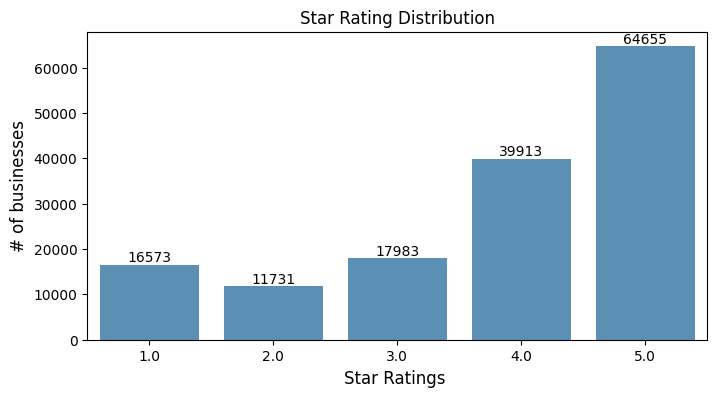

In [ ]:
#Get the distribution of the ratings
x=combined_business_data['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Categories Distribution:

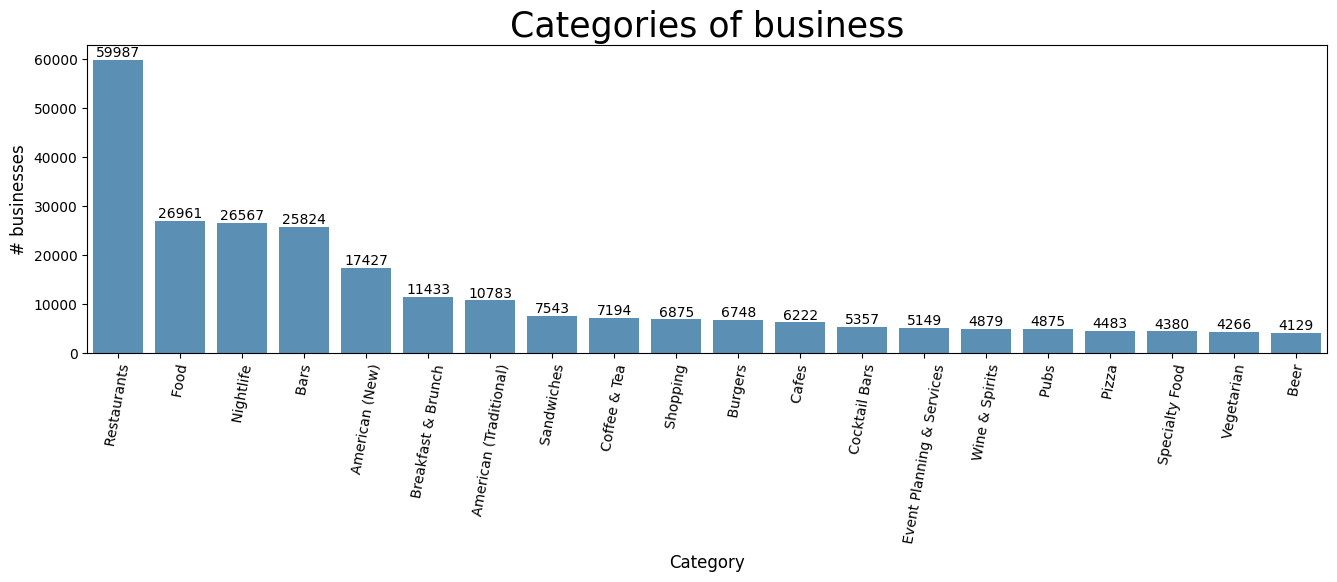

In [ ]:
business_cats = ''.join(combined_business_data['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)#,color=color[5])
plt.title("Categories of business",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#Save Data to CSV

In [ ]:
#final necessary data
dataset=combined_business_data[['stars','text']]
display(dataset.head(5))

,stars,text
0,5.0,I've taken a lot of spin classes over the year...
1,5.0,I've been going to Body Cycle for about a year...
2,5.0,I started going to BCS in May or June of 2014....
3,5.0,Love this Place! The instructors actually care...
4,4.0,Wow what a workout. I had Maria but it was her...


In [ ]:
# prompt: 将dataset划分为train和test，准备用于BERT情感分析

from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)

# Save the train and test sets to CSV files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)

# Save the train and test sets to CSV files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)


In [ ]:
#final necessary data
dataset=combined_business_data[['user_id', 'business_id', 'stars','text']]
display(dataset.head(5))

,user_id,business_id,stars,text
0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,I've taken a lot of spin classes over the year...
1,BwSiqaeusSkkLRefYFB-Vg,7ATYjTIgM3jUlt4UM3IypQ,5.0,I've been going to Body Cycle for about a year...
2,d6H0HhqyOLiihCG6gbV4cg,7ATYjTIgM3jUlt4UM3IypQ,5.0,I started going to BCS in May or June of 2014....
3,yHy4xIfrENhYptOScwqHUA,7ATYjTIgM3jUlt4UM3IypQ,5.0,Love this Place! The instructors actually care...
4,uPr3t2M-OykA8M_oro7j1A,7ATYjTIgM3jUlt4UM3IypQ,4.0,Wow what a workout. I had Maria but it was her...


In [ ]:
#convert id to number
dictionary_user=dict(zip(list(dataset['user_id'].drop_duplicates().values), range(len(dataset['user_id'].drop_duplicates().values))))
dictionary_business=dict(zip(list(dataset['business_id'].drop_duplicates().values), range(len(dataset['business_id'].drop_duplicates().values))))
user_set=[]
for user in dataset['user_id']:
  user_set.append(dictionary_user[user]+1)
business_set=[]
for business in dataset['business_id']:
  business_set.append(dictionary_business[business]+1)
dataset['user_id']=user_set
dataset['business_id']=business_set
display(dataset.head(5))

<ipython-input-19-bedb23051c5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['user_id']=user_set
<ipython-input-19-bedb23051c5d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['business_id']=business_set


,user_id,business_id,stars,text
0,1,1,5.0,I've taken a lot of spin classes over the year...
1,2,1,5.0,I've been going to Body Cycle for about a year...
2,3,1,5.0,I started going to BCS in May or June of 2014....
3,4,1,5.0,Love this Place! The instructors actually care...
4,5,1,4.0,Wow what a workout. I had Maria but it was her...


In [ ]:
#store the dataset and then read it
dataset.to_csv('rating_text.csv',header=-1,index=0)
df = pd.read_csv('rating_text.csv')

In [ ]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# 加载数据
data = pd.read_csv('rating_text.csv')
texts = data['text'].tolist()

# 加载预训练DistilBERT tokenizer和模型
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased', output_hidden_states=True)

# 设置批量大小和设备
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# 序列分割函数
def split_encode(text, tokenizer, model, max_length=512):
    encodings = tokenizer.encode_plus(text, max_length=max_length, truncation=True, return_tensors='pt')
    input_ids, attention_mask = encodings.input_ids, encodings.attention_mask

    chunk_ids = torch.split(input_ids, max_length, dim=1)
    chunk_masks = torch.split(attention_mask, max_length, dim=1)

    chunk_embeddings = []
    for chunk_id, chunk_mask in zip(chunk_ids, chunk_masks):
        with torch.no_grad():
            outputs = model(chunk_id.to(device), attention_mask=chunk_mask.to(device))
            chunk_embeddings.append(outputs.last_hidden_state[:, 0, :].cpu())

    sequence_embedding = torch.mean(torch.stack(chunk_embeddings), dim=0)
    return sequence_embedding

# 批量编码
all_embeddings = []

for idx in range(0, len(texts), batch_size):
    # 获取当前批次
    batch_texts = texts[idx:idx+batch_size]

    batch_embeddings = [split_encode(text, tokenizer, model) for text in batch_texts]
    batch_embeddings = torch.stack(batch_embeddings)

    all_embeddings.append(batch_embeddings)

# 拼接所有批次的嵌入向量
all_embeddings = torch.cat(all_embeddings, dim=0)
print(f'Shape of sentence embeddings: {all_embeddings.shape}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Shape of sentence embeddings: torch.Size([150855, 1, 768])


In [ ]:
data.head()

,user_id,business_id,stars,text
0,1,1,5.0,I've taken a lot of spin classes over the year...
1,2,1,5.0,I've been going to Body Cycle for about a year...
2,3,1,5.0,I started going to BCS in May or June of 2014....
3,4,1,5.0,Love this Place! The instructors actually care...
4,5,1,4.0,Wow what a workout. I had Maria but it was her...


In [ ]:
# 假设之前获得的all_embeddings张量的shape为 (num_samples, 1, embedding_dim)
all_embeddings = all_embeddings.squeeze(1) # 将中间的维度1去掉,形状变为 (num_samples, embedding_dim)

# 创建DataFrame
review_df = pd.DataFrame(all_embeddings.numpy())

# 若有其他特征,如user_id、business_id等,将它们作为额外的列添加到DataFrame中
review_df = review_df.assign(user_id=data['user_id'], business_id=data['business_id'], stars=data['stars'])

# 保存为CSV文件
review_df.to_csv('rating_review_emb.csv',header=-1,index=0)

In [ ]:
df = pd.read_csv('rating_review_emb.csv')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,user_id,business_id,stars
0,0.079305,0.022063,-0.222636,-0.110820,-0.052119,-0.351204,0.301306,0.362342,-0.006960,-0.326483,...,-0.383700,0.173955,0.128305,-0.123150,0.075545,0.346931,0.111605,1,1,5.0
1,0.185345,-0.015614,0.083354,-0.031993,0.023231,-0.422337,0.521034,0.646533,-0.256150,-0.462285,...,-0.356400,0.067835,0.177134,-0.153897,-0.016966,0.419590,0.122915,2,1,5.0
2,0.112992,-0.061014,0.040658,-0.064818,-0.047775,-0.318119,0.304710,0.485569,-0.103251,-0.380788,...,-0.161461,0.076198,0.082788,-0.252626,0.067672,0.277993,0.258296,3,1,5.0
3,0.143441,0.067181,0.112095,-0.004611,0.041152,-0.421212,0.264116,0.584848,-0.118551,-0.206433,...,-0.261449,0.000506,0.158504,-0.214677,-0.161361,0.370058,0.163632,4,1,5.0
4,0.101252,-0.069748,0.010583,-0.026406,-0.057089,-0.385323,0.228679,0.415165,-0.137443,-0.144708,...,-0.273090,0.133276,0.105098,-0.178985,0.166974,0.222973,0.178510,5,1,4.0


In [ ]:
#store the dataset and then read it
dataset.iloc[:,:-1].to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset@Yelp/rating.csv',header=0,index=0)
pd.read_csv('rating.csv')

,1,1.1,5.0
0,2,1,5.0
1,3,1,5.0
2,4,1,5.0
3,5,1,4.0
4,6,1,3.0
...,...,...,...
150849,41121,2700,5.0
150850,77901,2701,5.0
150851,9729,2702,1.0
150852,68981,2703,1.0
